In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import numpy as np
import random

import unidecode

import rdkit
from rdkit import Chem

import pandas as pd

In [2]:
from utils import get_props, strsmis2listsmis, check_validity, logP, molWt, numAcc, numDon, rolBon

## UMAP on morgan fingerprint to see if there is overlaps

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.manifold import TSNE
import umap
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha':0.5, 's':80, 'linewidth':0}

In [10]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import DataStructs
from rdkit.Chem.Draw import IPythonConsole

In [11]:
RL_file = 'gen_smis/RL_1_all_smis_.txt'

RL = pd.read_csv(RL_file, header=None)
RL_smis = list(RL[0])

#-------------------------------------------------------------------------------------------------

CRLV_file = 'gen_smis/CRLV_1_all_smis_.txt'

CRLV = pd.read_csv(CRLV_file, header=None)
CRLV_smis = list(CRLV[0])

print(len(RL_smis), len(CRLV_smis))

10000 10000


In [12]:
RL_val = []
CRLV_val = []
for s2, s3 in zip(RL_smis, CRLV_smis):
    v2 = check_validity(s2)
    if v2 == 1:
        RL_val.append(s2)
    v3 = check_validity(s3)
    if v3 == 1:
        CRLV_val.append(s3)
        
print(len(RL_val))
print(len(CRLV_val))

print("-----------------------------")
RL_unq = list(set(RL_val))
CRLV_unq = list(set(CRLV_val))
print(len(RL_unq))
print(len(CRLV_unq))

7698
6633
-----------------------------
5820
4800


In [13]:
RL_mols = []
for s in RL_unq:
    RL_mols.append(Chem.MolFromSmiles(s))
    
print(len(RL_mols))

CRLV_mols = []
for s in CRLV_unq:
    CRLV_mols.append(Chem.MolFromSmiles(s))
    
print(len(CRLV_mols))

5820
4800


In [14]:
RL_X = []
for mol in RL_mols:
    arr = np.zeros((0,))
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2)
    DataStructs.ConvertToNumpyArray(fp, arr)
    RL_X.append(arr)
    
print('{} mols loaded'.format(len(RL_X)))

CRLV_X = []
for mol in CRLV_mols:
    arr = np.zeros((0,))
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2)
    DataStructs.ConvertToNumpyArray(fp, arr)
    CRLV_X.append(arr)
    
print('{} mols loaded'.format(len(CRLV_X)))

5820 mols loaded
4800 mols loaded


In [15]:
import numba
@numba.njit()
def tanimoto_dist(a,b):
    dotprod = np.dot(a,b)
    tc = dotprod / (np.sum(a) + np.sum(b) - dotprod)
    return 1.0-tc

In [18]:
umap_RL_X = umap.UMAP(n_neighbors=8, min_dist=0.3, metric=tanimoto_dist).fit_transform(RL_X)
print(umap_RL_X.shape)

umap_CRLV_X = umap.UMAP(n_neighbors=8, min_dist=0.3, metric=tanimoto_dist).fit_transform(CRLV_X)
print(umap_CRLV_X.shape)

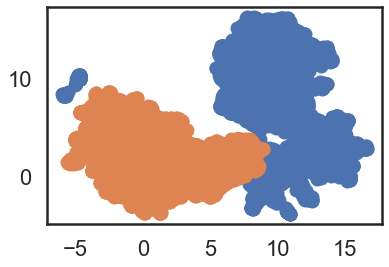

In [17]:
# plots for objective 1
plt.scatter(umap_RL_X.T[0], umap_RL_X.T[1])       #, **plot_kwds)
plt.scatter(umap_CRLV_X.T[0], umap_CRLV_X.T[1])   #, **plot_kwds)

# plt.savefig('gen_smis/obj1_umap.png', dpi=300)

## KDE and UMAP plots: generated molecules VS dataset 

### Generated molecules:

In [3]:
G1 = pd.read_csv('gen_smis/G_all_smis_.txt', header=None)
# G1.head()

In [4]:
G1_smis = list(G1[0])
print(len(G1_smis))

10000


In [5]:
val_smis = []
for i, s in enumerate(G1_smis):
    v = check_validity(s)
    if v == 1:
        val_smis.append(s)
#         print("mol at:", i, " : verified")

In [6]:
len(val_smis)

7685

In [7]:
# get their chemical props:
lgp = []
mlw = []
hba = []
hbd = []
rbn = []
for s in val_smis:
    lgp.append(logP(s))
    mlw.append(molWt(s))
    hba.append(numAcc(s))
    hbd.append(numDon(s))
    rbn.append(rolBon(s))

<AxesSubplot:ylabel='Density'>

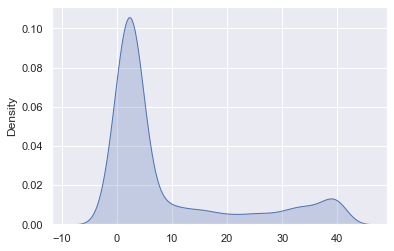

In [8]:
sns.kdeplot(x=lgp, fill=True, label='G', shade=True)
# plt.savefig("gen_smis/G_logP.png", dpi=300)